In [4]:
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [248]:
class Catan_Board:
    
    def __init__(self=None,mode=None,big=None):
        self.big=big
        self.mode=mode              
                   
    def Num2Res(self=None):
        
        if self.big == 0:
            Num_Values=np.hstack([5*np.ones(4,dtype=int),
                                  4*np.ones(4,dtype=int),
                                  3*np.ones(4,dtype=int),
                                  2*np.ones(4,dtype=int),
                                    np.ones(2,dtype=int)])
            Num_Tokens=np.array([6,6,8,8,5,5,9,9,4,4,10,10,3,3,11,11,2,12],dtype=int)
        else:
            Num_Values=np.hstack([5*np.ones(6,dtype=int),
                                  4*np.ones(6,dtype=int),
                                  3*np.ones(6,dtype=int),
                                  2*np.ones(6,dtype=int),
                                    np.ones(4,dtype=int)])
            Num_Tokens=np.array([6,6,6,8,8,8,5,5,5,9,9,9,4,4,4,10,10,10,3,3,3,11,11,11,2,2,12,12],dtype=int)
        
        average_sum=sum(Num_Values)//5
        if self.mode==1:
            distrb=np.array([average_sum,average_sum,average_sum+1,average_sum+1,average_sum+1]) 
        elif self.mode==2:  
            distrb=np.array([average_sum,average_sum,average_sum,average_sum,average_sum+3]) 
        else:
            distrb=np.array([average_sum-1,average_sum+1,average_sum+1,average_sum+1,average_sum+1]) 
        
        rand.shuffle(distrb)
    
        Nam=['Brick','Ore','Lumber','Grain','Sheep']
        idx=np.arange(len(Num_Values))

        d=None
        while d != distrb[3]:
            c=None
            while c != distrb[2]:
                b=None
                while b != distrb[1]:
                    a=None
                    while a != distrb[0]:
                        rand.shuffle(idx)
                        Num_Values=Num_Values[idx]
                        Num_Tokens=Num_Tokens[idx]
                        a=int(sum(Num_Values[:(list(Num_Values).count(5)-1)]))
                    b=int(sum(Num_Values[(list(Num_Values).count(5)-1):(2*(list(Num_Values).count(5)-1))]))
                c=int(sum(Num_Values[(2*(list(Num_Values).count(5)-1)):(3*(list(Num_Values).count(5))-2)]))
            d=int(sum(Num_Values[(3*(list(Num_Values).count(5))-2):(4*(list(Num_Values).count(5))-2)]))


        Res=list(np.ones((list(Num_Tokens).count(6)+1)**3-(list(Num_Tokens).count(6))**3))
        for i in np.arange(len(Num_Values)):
            if i <(list(Num_Values).count(5)-1):
                Res[i]=np.array([Nam[0],Num_Tokens[i]])
            elif (list(Num_Values).count(5)-1) <= i and i < (2*(list(Num_Values).count(5)-1)):
                Res[i]=np.array([Nam[1],Num_Tokens[i]])
            elif (2*(list(Num_Values).count(5)-1)) <= i and i < (3*(list(Num_Values).count(5))-2):
                Res[i]=np.array([Nam[2],Num_Tokens[i]])
            elif (3*(list(Num_Values).count(5))-2) <= i and i < (4*(list(Num_Values).count(5))-2):
                Res[i]=np.array([Nam[3],Num_Tokens[i]])
            else:
                Res[i]=np.array([Nam[4],Num_Tokens[i]])
        for u in range(0,list(Num_Tokens).count(2)):
            Res[len(Num_Values)]=np.array(['Desert',0])
            Num_Values=np.append(Num_Values,0)
        if self.big==1:
            for k in np.arange(7):
                Res[-1*k-1]=np.array(['Sea',' '])
                Num_Values=np.append(Num_Values,100)
            Res[-7],Res[19]=Res[19],Res[-7]
            Num_Values[-7],Num_Values[19]=Num_Values[19],Num_Values[-7]
        return(Res,Num_Values)

    def checkall(self=None,check=None,require=None): #ignores number greater than 100
        urn=np.arange(len(check))
        for i in urn:
            if check[i] in require or (check[i] >= 100):
                urn[i]=1
            else:
                urn[i]=0
        return(all(urn),list(urn).count(0))

    def disk_sum(self=None,number=None,radius=None): #radius >= 1    
#         if (len(number)) !=  [1, 7, 19, 37, 61, 91, 127, 169, 217, 271, 331, 397, 469, 547][radius]:        
#             return("Not a complete ring")
#         else:        
        sumset=np.ones(6*(radius**2), dtype=int)
        for i in np.arange(6):
            re=np.arange(1,7)                
            sumset[i]=int(number[0]+number[i+1]+number[re[np.mod(i+1,6)]])

        for x in np.arange(2,radius+1):
            n=6*(x)**2-6*(x-1)**2
            for k in np.arange(6):

                idd=k*(2*x-1)+6*(x-1)**2
                even=(x**3)-((x-1)**3) + k*x
                odd= ((x-1)**3)-((x-2)**3) + k*(x-1)

                hexseq=np.ones(int(n/6)+2,dtype=int)
                for m in np.arange(int(n/6)+2):
                    if not m % 2:
                        hexseq[m]=int(even+m/2)
                    else:
                        hexseq[m]=int(odd+m//2)
                if k==5:
                    hexseq[-1]=hexseq[-2]
                    hexseq[-2]=int(((x-1)**3)-((x-2)**3))
                for l in np.arange(len(hexseq[:-2])):
                    sumset[int(idd+l)]=int(sum(number[hexseq[l:l+3]]))
        return(sumset)
                
                
    def spiral(self=None,center=None,radius=None):
        cubedirect=np.vstack([np.array([2,0]), #left first
                              np.array([1,2]),
                              np.array([-1,2]),
                              np.array([-2,0]),
                              np.array([-1,-2]),
                              np.array([1,-2])])       

        result=list(np.ones(((radius+1)**3)-((radius)**3)))
        result[0]=np.array(center)

        for k in np.arange(1,radius+1):
            cube=np.array(center)+cubedirect[-2]*k
            result[int(((k)**3)-((k-1)**3))]=cube
            for i in np.arange(6):
                if i == 5:
                    for j in np.arange(k-1):
                        cube = cube + cubedirect[i]
                        result[int(((k)**3)-((k-1)**3)+i*k+(j+1))]=cube
                else:
                    for j in np.arange(k):
                        cube = cube + cubedirect[i]
                        result[int(((k)**3)-((k-1)**3)+i*k+(j+1))]=cube
        return np.array(result)
    def shuffle_parts(self=None,original_set=None, stationary_id=None):

        idx=np.arange(len(original_set))
        for i in idx[::-1]:
            if i in stationary_id:
                continue
            else:
                last=stationary_id[0]
                while last in stationary_id:
                    last=rand.randint(i+1)
                original_set[last],original_set[i]=original_set[i],original_set[last]
        return(original_set)
    
    
    res_token=[]
    token_value=[]
    
    def get_board(self=None,adj6=None,val_stack=None,stack_num=None):
        big=self.big
        
        idx=np.arange(len(self.token_value))
        
        l=0
        iteration=1
        sea=np.array([19,36,35,34,33,32,31])
        station=np.array([0,1,2,3,4,5,6,19,36,35,34,33,32,31])
        while self.checkall(self.disk_sum(self.token_value[idx],big+2),[7,8,9,10,11])[1] > 2 :
            #rand.shuffle(idx)
            if adj6:           #first ring
                while (list(self.token_value[idx][:7]).count(val_stack) != stack_num ) or not self.checkall(self.disk_sum(self.token_value[idx],1), [8,9,10,11])[0]:    
                    self.shuffle_parts(idx,sea)
            else:
                while not self.checkall(self.disk_sum(self.token_value[idx],1), [9,10,11])[0]:
                    self.shuffle_parts(idx,sea)

            if big: #second and third ring
                while self.checkall(self.disk_sum(self.token_value[idx],big+2),[7,8,9,10,11])[1]>2: 
                    self.shuffle_parts(idx,station)
                    iteration=iteration+1
                    if not np.mod(iteration,10000):
                        l=l+1
                        print(iteration)
                        break    
            else:
                 while not self.checkall(self.disk_sum(self.token_value[idx],big+2),[8,9,10,11])[0]: 
                    self.shuffle_parts(idx,np.arange(7))
                    iteration=iteration+1
                    if not np.mod(iteration,50000):
                        l=l+1
                        print(iteration)
                        break    
        return(np.array(self.res_token)[idx],self.disk_sum(self.token_value[idx],big+2),iteration,l)
    
    def plot_board(self=None,getboard=None):
        colors = [(155/256,82/256,29/256),#brick
          (100/256,97/256,104/256),#ore
          (41/256,87/256,41/256), #lumber
          (253/256,245/256,138/256),#grain
          (142/256, 191/256, 73/256), #sheep
          (216/256, 179/256, 109/256), #desert
          (255/256,215/256,0), #gold
          (0,163/256,226/256) #ocean
         ]

        cm = LinearSegmentedColormap.from_list('my_list', colors, N=8)
        Names=['Brick','Ore','Lumber','Grain','Sheep','Desert','Gold','Sea']
        z=list(8*np.ones((self.big+4)**3-(self.big+3)**3))
        for i in np.arange((self.big+3)**3-(self.big+2)**3):
            z[i]=Names.index(np.array(getboard[0])[i][0])

        ######### Text/Graph

        x = self.spiral([0,0],self.big+3)[:,0]
        y = self.spiral([0,0],self.big+3)[:,1]


        #fig, ax = plt.subplots(ncols=1, sharey=True,  figsize=(13, 10))
        plt.figure(figsize=(15,12))
        plt.hexbin(x,y,z, gridsize=10,extent=[-9,11,-10,10], bins=None,cmap=cm,edgecolors="black")
        plt.title("Catan Board")
        plt.colorbar()
        #cb.set_label('Color')

        plt.xticks(np.arange(-9,11,1))
        plt.yticks(np.arange(-10,10,1))
        for i in np.arange((self.big+3)**3-(self.big+2)**3):
            if np.array(getboard[0])[:,1][i] == "6" or np.array(getboard[0])[:,1][i] == "8":
                plt.text(x[i],y[i],np.array(getboard[0])[:,1][i],fontsize=20,color="r")
            else:
                plt.text(x[i],y[i],np.array(getboard[0])[:,1][i],fontsize=20)

        plt.grid(0)
        plt.show()
        return(getboard[1:])



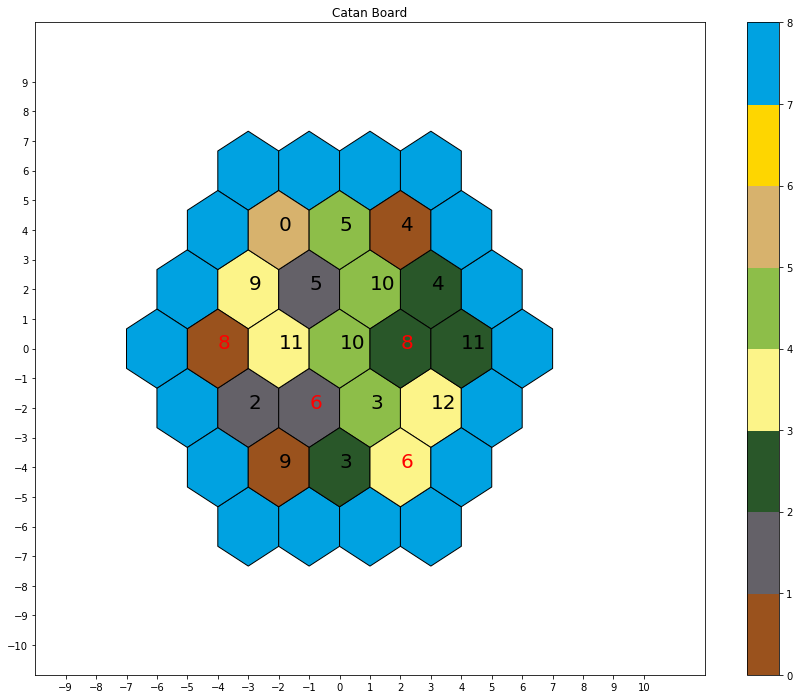

(array([10, 10, 11, 10,  9, 10, 11,  9,  9,  8,  8,  8, 10, 11,  9, 10, 11,
         8,  8, 10, 11,  8,  8, 10]), 13153, 0)

In [253]:
G=Catan_Board(3,big=0)
Hexes=G.Num2Res()
G.res_token,G.token_value=Hexes[0],Hexes[1]
hexlist=G.get_board()
G.plot_board(hexlist)

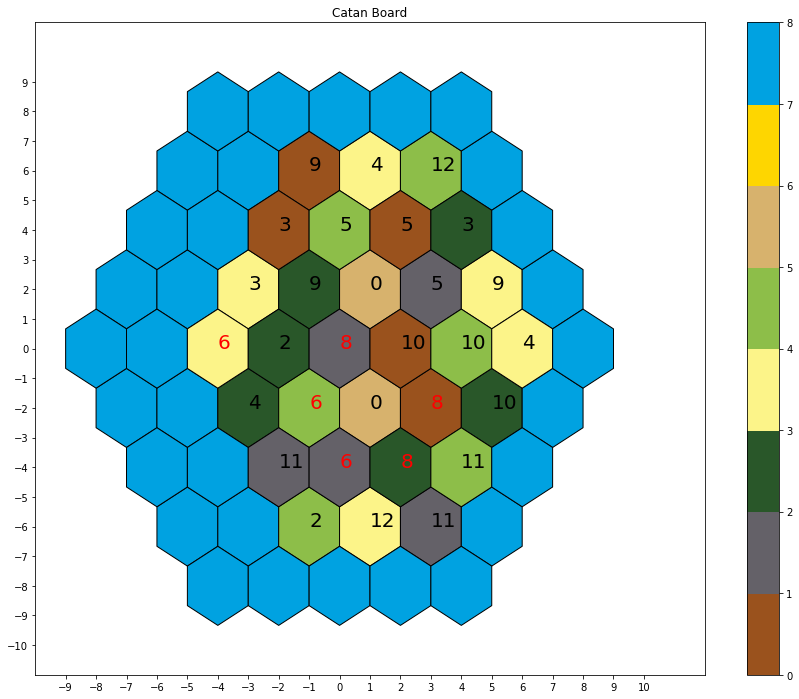

(array([ 10,   8,   8,   9,  10,  11,  12,  10,  10,  10,   8,  11,  10,
          7,   8,   8,   8,  10,   8,   7,   8,   9,   9,  10, 103,   8,
          7,  11,   8,   9,  12,  10,  11,   9,  10,  11,  10,  10,   7,
          8,  11,  11,  10, 106, 202, 104, 202, 107, 205, 205, 108, 203,
        105, 202]), 4175, 0)

In [257]:
G=Catan_Board(3,big=1)
Hexes=G.Num2Res()
G.res_token,G.token_value=Hexes[0],Hexes[1]
hexlist=G.get_board(1,0,2)
G.plot_board(hexlist)